# 04 - Exploring Grid

In trajectories data mining process, there is a need frequent acess differents segments and  samples of trajectories. With big volume data, those acesses can need time and processing. With this, it's necessary to adopt effective techniques to management and handling of this data, allowed fast recovery of data.


One approach to this technique takes geographic space into account, dividing it into grids, the so-called **grids**, and **creating a time index for the trajectories that fall into each cell of this grid**. **Each segment** that falls into a grid **is represented by a point with coordinates equal to the start time point and the end time point of the segment**.


In PyMove, grids are delimited by coordinates in a 
cartesian plan based tracing in bound box of data. Grids are represented by objects that have those attributes:

- **lon_min_x:** minimum longitude.
- **lat_min_y:** minimum latitude. 
- **grid_size_lat_y:** grid latitude size. 
- **grid_size_lon_x:** grid longitude size.
- **cell_size_by_degree:** cell size of Grid.

## Imports


In [1]:
from pymove import read_csv
from pymove.core.grid import Grid

## Load data

In [2]:
df = read_csv('geolife_sample.csv', parse_dates=['datetime'])
data = df[:1000]
data

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1
...,...,...,...,...
995,40.013765,116.306468,2008-10-23 23:43:31,1
996,40.013828,116.306413,2008-10-23 23:43:36,1
997,40.013905,116.306365,2008-10-23 23:43:41,1
998,40.013992,116.306323,2008-10-23 23:43:46,1


## Create virtual Grid

In [3]:
grid = Grid(data, 15)

In [4]:
grid.get_grid()

{'lon_min_x': 116.305468,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.00013533905150922183}

## Create one polygon to point on grid

In [5]:
print(grid.create_one_polygon_to_point_on_grid(2, 1))

POLYGON ((116.3056033390515 39.97078167810302, 116.3056033390515 39.97091701715453, 116.305738678103 39.97091701715453, 116.305738678103 39.97078167810302, 116.3056033390515 39.97078167810302))


## Create or update index grid feature

In [6]:
grid.create_update_index_grid_feature(data)

In [7]:
data.head()

,lat,lon,datetime,id,index_grid
0,39.984094,116.319236,2008-10-23 05:53:05,1,34541
1,39.984198,116.319322,2008-10-23 05:53:06,1,34883
2,39.984224,116.319402,2008-10-23 05:53:11,1,34883
3,39.984211,116.319389,2008-10-23 05:53:16,1,34883
4,39.984217,116.319422,2008-10-23 05:53:21,1,35224


## Create all polygons to all point on grid

In [8]:
grid_data = grid.create_all_polygons_to_all_point_on_grid(data)

In [9]:
grid_data.head()

,id,index_grid_lat,index_grid_lon,polygon
0,1,100,101,"POLYGON ((116.3191372442024 39.98404490515092,..."
1,1,101,102,"POLYGON ((116.3192725832539 39.98418024420243,..."
4,1,101,103,"POLYGON ((116.3194079223055 39.98418024420243,..."
5,1,104,106,"POLYGON ((116.31981393946 39.98458626135696, 1..."
6,1,104,105,"POLYGON ((116.3196786004085 39.98458626135696,..."


## Create all polygons on grid

In [10]:
grid.create_all_polygons_on_grid()

In [11]:
(grid.grid_polygon).shape

(341, 266)

## Get point to index grid

In [12]:
grid.point_to_index_grid(39.984094, 116.319236)

(100.0, 101.0)

## Save grid to .pkl

In [13]:
grid.save_grid_pkl('teste.pkl')

## Read .pkl to grid

In [14]:
grid.read_grid_pkl('teste.pkl').get_grid()

{'lon_min_x': 116.305468,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.00013533905150922183}

## Show a grid polygons

In [15]:
from pymove.visualization.matplotlib import plot_grid_polygons

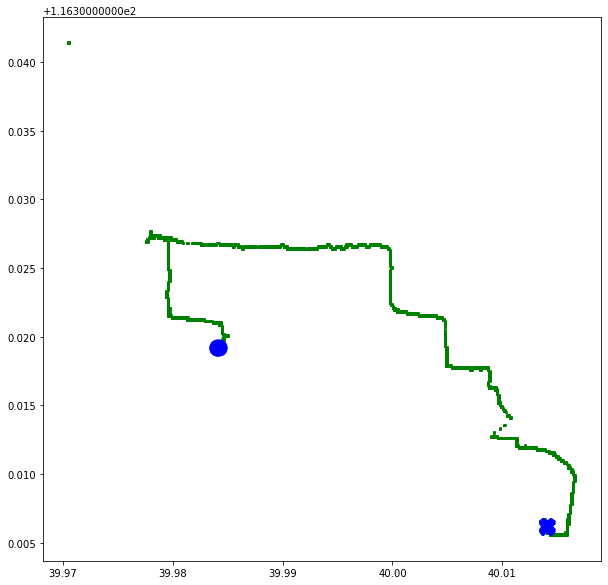

In [16]:
plot_grid_polygons(grid_data, return_fig=False)